In [98]:
# Data processing
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
# Model and performance
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, matthews_corrcoef,confusion_matrix, roc_curve, auc,precision_recall_curve, balanced_accuracy_score, roc_auc_score
from sklearn import preprocessing 
from sklearn.ensemble import IsolationForest

In [3]:
root = "/home/sihartist/Desktop/"
path = root + "fraud-detection/dataset/preprocessing_data.xlsx"

In [4]:
data = pd.read_excel(path)

# Isolation Forest

In [99]:
X = data.drop(["CLASS"], axis=1).values
y = data["CLASS"].values
X = preprocessing.MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_normal = X_train[np.where(y_train == 0)]

In [128]:
rng= np.random.RandomState(42)

ISF = IsolationForest(n_estimators=100, random_state=rng, contamination=0.5, max_features=0.5)
ISF.fit(X_train_normal)

IsolationForest(contamination=0.5, max_features=0.5,
                random_state=RandomState(MT19937) at 0x7F3D735DF840)

In [129]:
ypred = ISF.predict(X_test)
ypred[ ypred == 1] = 0
ypred[ ypred == -1] = 1
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56     14113
           1       0.58      0.69      0.63     14018

    accuracy                           0.60     28131
   macro avg       0.60      0.60      0.59     28131
weighted avg       0.60      0.60      0.59     28131



In [102]:
# Matrice de confusion
cm_isf = confusion_matrix(np.concatenate((np.ones(len(X_test_normal)), outliers)), np.concatenate((normal_isf, fraud_isf)))
print("Confusion matrix:\n", cm_isf)

Confusion matrix:
 [[8982 5036]
 [5625 8488]]


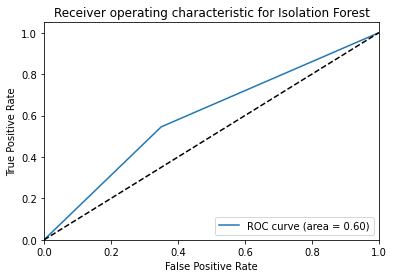

In [78]:
# Calculating and plotting ROC curve
fpr, tpr, thresholds = roc_curve(np.concatenate((np.ones(len(normal_isf)), -1*np.ones(len(fraud_isf)))), np.concatenate((normal_isf, fraud_isf)))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Isolation Forest')
plt.legend(loc="lower right")
plt.show()